# Basics of metku

This tutorial discusses the basic use of the metku package.

# Structure of metku

metku is a modular package that includes the following features
* Design of steel cross-sections and members according to the Eurocode (eurocodes, sections, structures)
* Finite element analysis of trusses and frames (framefem)
* Tools for creating truss and frame structures (raami)
* Tools for defining and solving structural optimization problems (optimization)


# Creating a steel member
metku/structures/steel/steel_member.py
metku/sections/steel/

Defining a steel member requires a cross-section, length. Additionally, the buckling length reduction factor with respect to each principal axis can be provided.

The cross-section is a SteelSection type object. This class includes features common to all steel sections. Particular section types are subclasses of SteelSection. For example, to define a rectangular hollow section steel profile RHS 150x120x6.0 of S355 steel, we write

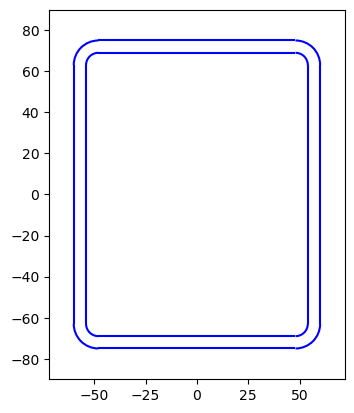

In [3]:
from metku.sections.steel.RHS import RHS

s = RHS(150,120,6.0)

s.draw()

The methods of SteelSection class include resistance evaluations, cross-section classification, etc. Most of these methods are self-explanatory. For example, to evaluate the axial force resistance of a the RHS profile defined above, we write

In [4]:
s.NRd

1066168.6623386329

By default, the units are (N,mm). Allowing other units is a work in progress.

Internal forces in a cross-section are given in the attributes 'Ned' (axial force), 'Med' (bending moment), 'Ved' (shear force), and 'Ted' (torque). Note that bending moment and shear force are set up as lists, because there can be internal forces with respect to two axes.

Med[0] = bending moment with respect to the major axis 
Med[1] = bending moment with respect to the minor axis 

Ved[0] = shear force in the horitonal direction
Ved[1] = shear force in the vertical direction

The attributes for internal forces can be accessed directly:

In [6]:
s.Ned = -100e3 # 100 kN compression force
s.Med[0] = 20e6 # 20 kNm bending moment with respect to the horizontal axis

Resistance of a cross-section can be evaluated by the method

section_resistance(self, axis='y', return_list=True, verb=False)

For example

In [9]:
res = s.section_resistance(verb=True)

print(res)

Cross-section design: RHS 150X120X6.0 S355.0
NEd = -100.00 kN; NRd = 1066.17 kN => UN = 0.09
VEd = 0.00 kN; VRd = 341.97 kN => UV = 0.00
MEd = 20.00 kNm; MRd = 54.66 kNm => UM = 0.37
[0.09379379035644395, 0.0, 0.365918325269656, 0.365918325269656]


When "return_list = True", the output of 'section_resistance' is a list of utilization ratios with respect to the different cross-section resistance checks, against individual internal forces and their interaction.

To create a 6m long steel member with RHS 150x120x6.0, we write 

In [11]:
from metku.structures.steel.steel_member import SteelMember

L = 6000
mem = SteelMember(s,L)

w = mem.weight()
print(f'Weight of the member w = {w:4.2f} kg')

Weight of the member w = 141.46 kg


To introduce internal force on a steel member, different sections are defined. This enables variation of internal forces along the member. New sections are defined by the 'add_section' method:

def add_section(self, ned=0.0, myed=0.0, mzed=0.0, vyed=0.0, vzed=0.0,
                    ted=0.0, loc=0.0):

y axis is the horizontal axis and z axis is the vertical axis.

The location of the section along the member is given by the local coordinate 'loc', which takes values between 0.0 and 1.0. 

In [ ]:
# These commands define two sections, at the end and at mid-span of the member.
# Both section have an axial force of 100 kN (compression)
mem.add_section(ned=-100e3,vzed=200e3,loc=0.0)
mem.add_section(ned=-100e3,myed=60e6,loc=0.5)